# WordPic

## Importar

In [ ]:
# %load basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format
liga = '/home/ef/Documents/Images/'

In [ ]:
import os
os.listdir(liga[:-7] + 'Text/')

['IV.csv', 'poem.txt', 'VI.csv', 'V.csv']

In [ ]:
##Veamos estructura del archivo (ej. para saber qué separador usar)
with open(liga[:-7] + 'Text/IV.csv','rb') as file:
    file = file.read()
    
file[:222]

b"character,dialogue\r\nTHREEPIO,Did you hear that?  They've shut down the main reactor.  We'll be destroyed for sure.  This is madness!\r\nTHREEPIO,We're doomed!\r\nTHREEPIO,There'll be no escape for the Princess this time.\r\nTHRE"

In [ ]:
df = pd.DataFrame()
for episodio in ['IV.csv', 'VI.csv', 'V.csv']:
    aux = pd.read_csv(liga[:-7] + 'Text/' +episodio)
    aux['Ep'] = episodio[:-4]
    df = df.append(aux)

df.rename(columns = {'dialogue':'Texto'}, inplace = True)
df.sample(7)

,character,Texto,Ep
748,LANDO,H-a-a-a...,V
409,VADER,"No, Captain, they're alive. I want every ship ...",V
612,LANDO,"You know, seeing you sure brings back a few th...",V
783,LEIA,Their tracking us!,IV
217,YODA,"Told you, did he?",VI
536,PIETT,"Lord Vader, our ships have completed their sca...",V
112,OWEN,You can waste time with your friends when your...,IV


## Funciones

In [ ]:
import re
import nltk
import unicodedata
from nltk.corpus import stopwords

def clean_text(text, language = 'spanish', add_stopwords = [], pattern='[^a-zA-Z]'):
     cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
     cleaned_text = re.sub(pattern, ' ', cleaned_text.decode('utf-8'), flags = re.UNICODE)
     cleaned_text = ' '.join([x for x in 
                              cleaned_text.lower().split() if x not in 
                              stopwords.words(language) + add_stopwords])        
     return cleaned_text

In [ ]:
from PIL import Image
from wordcloud import WordCloud

def get_wordcloud(text, image_dir, image_name, n_title = 20, repeat = False):
    orig = Image.open(image_dir + image_name)
    display(orig.resize((int(orig.size[0]/3),int(orig.size[1]/3))))
    img = Image.new('RGB', orig.size, (255,255,255))
    try:
        img.paste(orig,orig) #ajusta la parte transparente pa que no se interprete como negro
    except:
        mask = np.array(orig)
    else:
        img.paste(orig,orig)
        mask = np.array(img) #convierte la imagen a datos (# de color)
    wordcloud = WordCloud(mask = mask, #lienzo para las palabras
                          #dirección de fuente (tipo de letra)
                          font_path = '/usr/share/fonts/opentype/urw-base35/URWGothic-DemiOblique.otf',
                          color_func = lambda *args, **kwargs: 'white', #letras blancas
                          include_numbers = True,
                          prefer_horizontal = 0.83, #porcentaje de palabras horizontales
                          background_color = 'black', 
                          max_words = 10000,
                          max_font_size = 73,
                          repeat = repeat) #se repiten las palabras?
    wordcloud.generate(text+(' '+image[:-4].replace('_','-')+' ')*n_title
                      ).to_file(image_dir +f'WP_{image_name[:-4]}.png') #guarda como png
    wordcloud = Image.open(image_dir +f'WP_{image_name[:-4]}.png').convert('RGBA')
    datas = wordcloud.getdata() #para obtener nuevamente la info en datos (RGBA contempla transparencia en el último elem)
    wordcloud.putdata([(255,255,255,0) if x[0]==x[1]==x[2]!=255 else x for x in datas]) #si el color no es blanco (letras) vuelve transparente al pixelo
    wordcloud.paste(orig, box = (0,0), mask = wordcloud) #se sobrepone contra la orignal
    wordcloud.save(image_dir +f'WP_{image_name[:-4]}.png') #guarda la nueva imagen como png
    display(wordcloud)

## EDA

In [ ]:
more_stopwords = ['yes','good','us','going','come',
                  'know','want','right','back','see',
                  'oh','well','got','look']

df['Texto_limpio'] = [clean_text(x, language = 'english',
                                 add_stopwords = more_stopwords) for x in df['Texto']]
df.sample(7)

,character,Texto,Ep,Texto_limpio
774,LUKE,That's it! We did it!,IV,
605,STORMTROOPER,Freeze!,VI,freeze
606,LANDO,I'll get my people to work on it.,V,get people work
453,LUKE,"You're wrong, Leia. You have that power too. I...",VI,wrong leia power time learn use force strong f...
808,LEIA,If your people fixed the hyperdrive.,V,people fixed hyperdrive
547,LANDO,Fighters coming in.,VI,fighters coming
410,HAN,I have a really bad feeling about this.,VI,really bad feeling


In [ ]:
##Así se ve parte de todo texto unido
texto = ' '.join([x for x in df[(df['character'] == 'VADER') | 
                                (df['character'] == 'LUKE')]['Texto_limpio']])
texto[:222]

'hurry waiting get gear transmissions intercepted consular ship ambassador commander tear ship apart found plans bring ambassador alive shape guys biggs get academy change much soon hey happened get commission almost forgot'

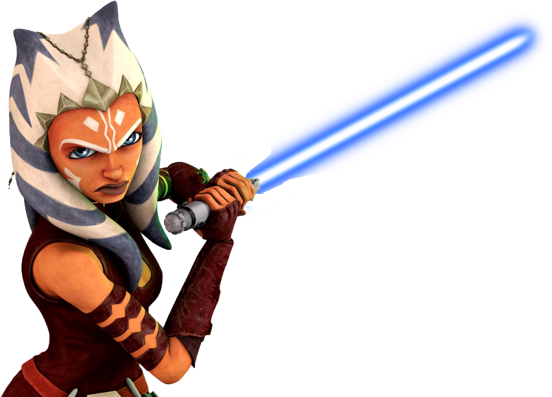

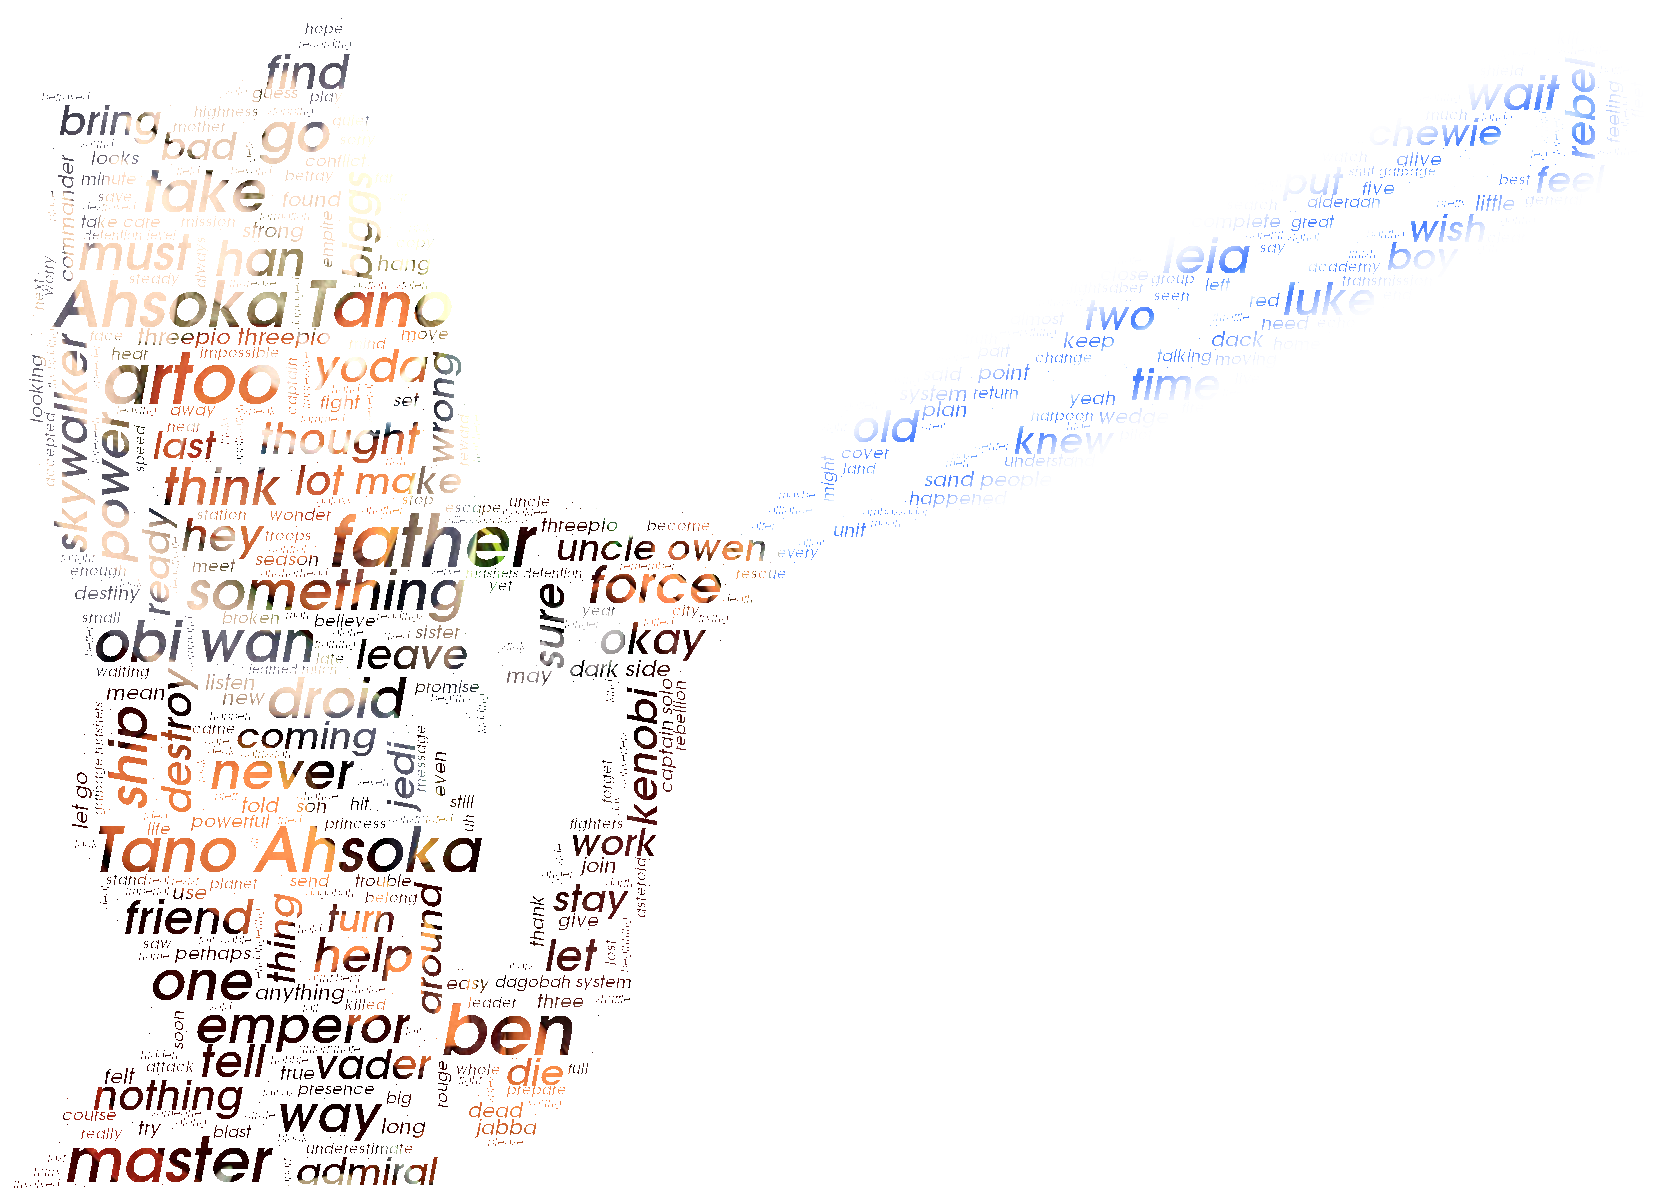

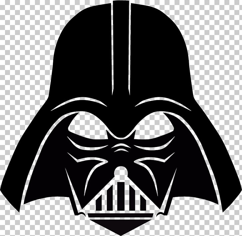

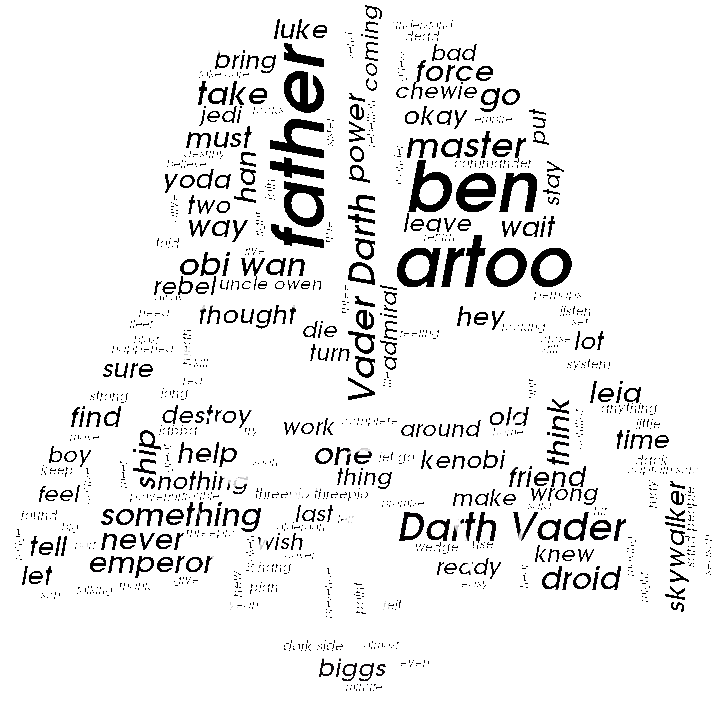

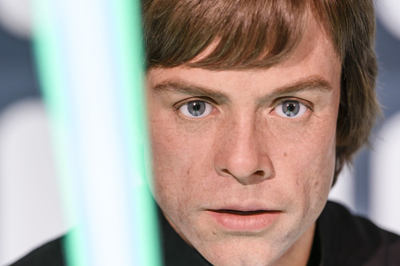

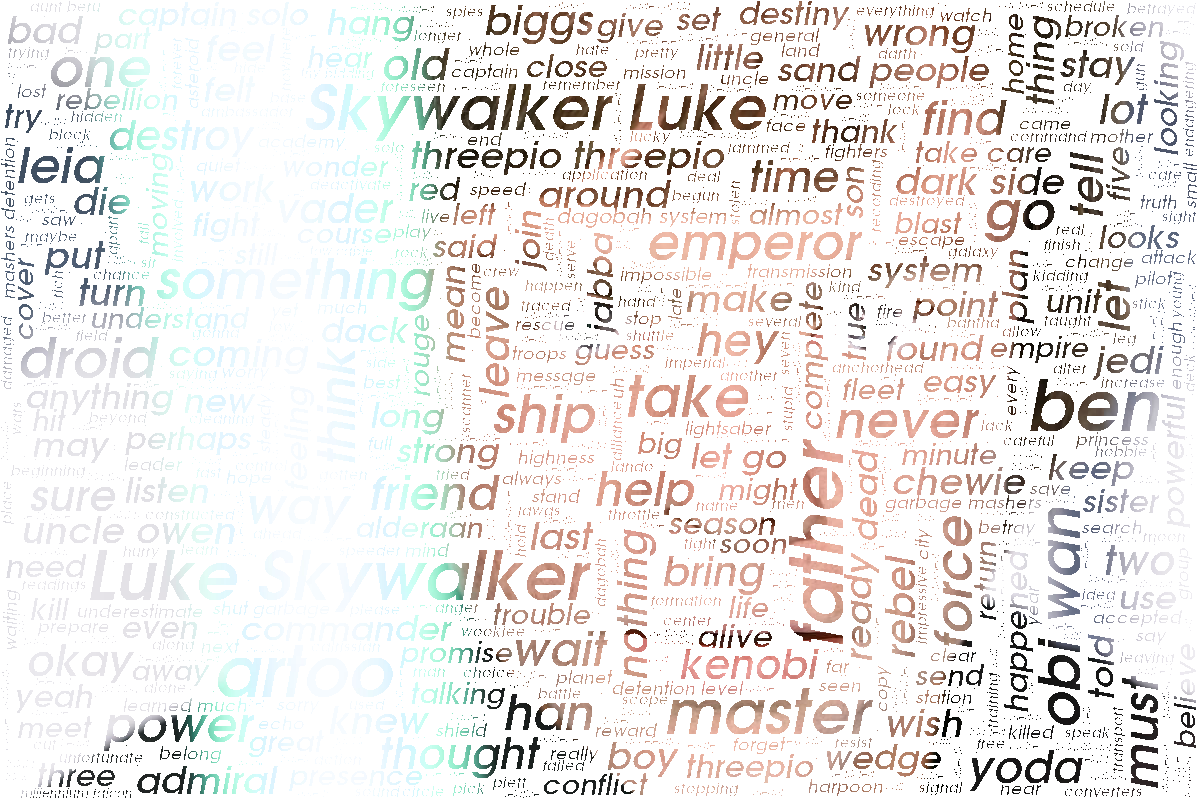

In [ ]:
##Original y WordPic
images = ['Ahsoka_Tano.png','Darth_Vader.jpg','Luke_Skywalker.jpg']
for image in images:
    get_wordcloud(texto, liga, image)